In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [ ]:
movies = pd.read_csv("Movie_classification.csv")

In [ ]:
# Discretizing the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Genre_n=le.fit_transform(movies['Genre'])

In [ ]:
d=[]
a=-1
for i in movies['3D_available']:
    if i=="YES":
        a=1
        d.append(a)
    elif i=="NO":
        a=0
        d.append(a)
movies['3d_available']=d

In [ ]:
movies['Genre_n']=Genre_n.tolist()
movies.drop(labels=['3D_available','Genre','Time_taken'],axis=1,inplace=True)
movies

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3d_available,Genre_n
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,23,494,48000,1,1,3
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,42,462,43200,0,0,2
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,38,458,69400,1,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,45,472,66800,1,1,2
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,55,395,72400,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,243.584,27,561,44800,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,263.296,20,600,41200,0,1,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,243.824,31,576,47800,0,0,1
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,303.520,47,607,44000,0,1,1


In [ ]:
#Take out the label Start_Tech_Oscar
#We are trying to predict Start_Tech_Oscar
X=movies.loc[:,movies.columns!='Start_Tech_Oscar']
y=movies['Start_Tech_Oscar']

In [ ]:
#Splitting Data into test and train data sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20) # 80% training and 20% test

In [ ]:
#Traning Support Vector Machine
#Creating a SVM Classifier with linear kernel
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.5980392156862745


In [ ]:
print("Precision:",metrics.precision_score(y_test, y_test_pred))

Precision: 0.6538461538461539


In [ ]:
print("Recall:",metrics.recall_score(y_test, y_test_pred))

Recall: 0.5964912280701754


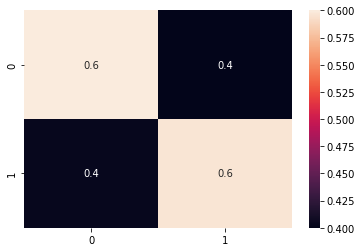

In [ ]:
#Confusion matrix for linear kernel

sns.heatmap(confusion_matrix(y_test, y_test_pred,normalize='true'), annot =True)

In [ ]:
#Traning Support Vector Machine
#Creating a SVM Classifier with polynomial kernel
clf_poly=SVC(kernel='poly')
clf_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
y_test_pred1 = clf_poly.predict(X_test)
y_train_pred1 = clf_poly.predict(X_train)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred1))

Accuracy: 0.5686274509803921


In [ ]:
print("Precision:",metrics.precision_score(y_test, y_test_pred1))

Precision: 0.5686274509803921


In [ ]:
print("Recall:",metrics.recall_score(y_test, y_test_pred1))

Recall: 1.0


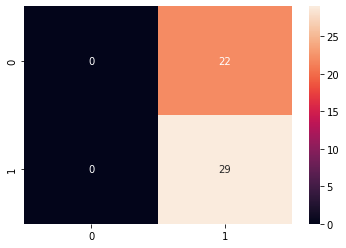

In [ ]:
#Confusion matrix for polynomial kernel
sns.heatmap(confusion_matrix(y_test, y_test_pred1), annot =True)

In [ ]:
#Traning Support Vector Machine
#Creating a SVM Classifier with Sigmoid kernel
clf_sigmoid=SVC(kernel='sigmoid')
clf_sigmoid.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [ ]:
y_test_pred2 = clf_sigmoid.predict(X_test)
y_train_pred2 = clf_sigmoid.predict(X_train)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred2))

Accuracy: 0.506578947368421


In [ ]:
print("Precision:",metrics.precision_score(y_test, y_test_pred2))

Precision: 0.506578947368421


In [ ]:
print("Recall:",metrics.recall_score(y_test, y_test_pred2))

Recall: 1.0


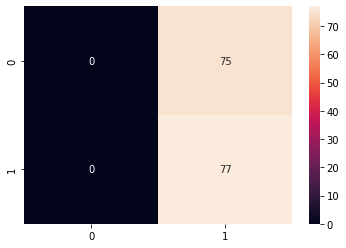

In [ ]:
#Confusion matrix for sigmoid kernel
sns.heatmap(confusion_matrix(y_test, y_test_pred2), annot =True)